In [12]:
import bs4 as bs
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np

In [13]:
def get_results(tech=None, market=None, stage=None):
    
    url = 'https://angel.co/companies?company_types[]=Startup&company_types[]=Private+Company&company_types[]=SaaS&company_types[]=Mobile+App'
    if tech:
        url = url + '&teches[]=' + tech
    if market:
        market = market.replace(' ', '+')
        url = url + '&markets[]=' + market
    if stage:
        url = url + '&stage=' + stage

    url = url + '&raised[min]=1000&raised[max]=100000000000'
    options = webdriver.ChromeOptions()
    options.add_argument('headless')
    
    driver = webdriver.Chrome()

    driver.set_window_size(3000, 1000)
    driver.get(url)
    time.sleep(5)
    
    sortby_raised = driver.find_element_by_xpath("//div[@class='column raised sortable']")

    sortby_raised.click()
    time.sleep(5)
    
    source = driver.page_source
    
    while True:
        try:
            source = driver.page_source
            loadMoreButton = driver.find_element_by_class_name('more').click()
            time.sleep(3)
        except: 
            break
            
    driver.close()

    try:
        soup = bs.BeautifulSoup(source, 'lxml')
        result_list =  soup.find_all('div', {'class': 'results'})[0]
        results = result_list.find_all('div', {'data-_tn': 'companies/row'})
    except:
        print('Could not get results')
        return

    
    return results

In [14]:
def parse_results(results):
    df = pd.DataFrame(columns=['kind', 'link', 'name', 'pitch', 'joined', 
                               'location', 'market', 'size', 'stage', 'raised'],
                  index=[0])
    
    for result in results[1:]:
        try:
            dic = {}
            try:
                dic['kind'] = result.a['data-type']
            except: dic['kind'] = None

            try:
                dic['link'] = result.a['href']
            except: dic['link'] = None

            try:
                dic['name'] = result.a['title']
            except: dic['name'] = None
                
            try:
                dic['website'] = result.find('div', {'data-column': 'website'}).text.split()[1]
            except: dic['website'] = None

            try:
                dic['pitch'] = result.find('div', {'class': 'pitch'}).text
            except: dic['pitch'] = None

            try:
                dic['joined'] = result.find('div', {'data-column': 'joined'}).text.split('Joined')[1].strip()
            except: dic['joined'] = None

            try:
                dic['location'] = result.find('div', {'data-column': 'location'}).text.split('Location')[1].strip()
            except: dic['location'] = None

            try:
                dic['market'] = result.find('div', {'data-column': 'market'}).text.split('Market')[1].strip()
            except: dic['market'] = None

            try:
                dic['size'] = result.find('div', {'data-column': 'company_size'}).text.split()[1]
            except: dic['size'] = None

            try:
                dic['stage'] = result.find('div', {'data-column': 'stage'}).text.split('Stage')[1].strip()
            except: dic['stage'] = None

            try:
                dic['raised'] = result.find('div', {'data-column': 'raised'}).text.split('Raised')[1].strip()
            except: dic['raised'] = None
            
            
            df = df.append(pd.DataFrame(dic, index=[0]))

        except: pass

    df = df.reset_index(drop=True)
    return df



def get_companies(tech=None, market=None, stage=None):
    results = get_results(tech, market, stage)
    if results:
        df = parse_results(results)
        return df

In [16]:
get_companies(tech="HTML5", market="Healthcare", stage=None)

,joined,kind,link,location,market,name,pitch,raised,size,stage,website
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb ’11,Startup,https://angel.co/company/drchrono,Sunnyvale,Medical Devices,DrChrono,\nOn a mission to fix healthcare\n,"$48,725,000",51-200,Series A,drchrono.com
2,Aug ’11,Startup,https://angel.co/company/seamless-medical-systems,Santa Fe,Healthcare,Seamless Medical Systems,\niPad patient registration and health informa...,"$3,000,000",1-10,-,seamlessmedical.com
3,Feb ’13,Startup,https://angel.co/company/fit3d,San Mateo,Fitness,Fit3D,"\nUsing 3D scanners, resulting data, and predi...","$5,390,000",11-50,Seed,fit3d.com
4,Dec ’12,Startup,https://angel.co/company/wildflower-health,San Francisco,Mobile Health,Wildflower Health,\nMobile programs that make healthcare smarter\n,"$5,100,000",11-50,Series B,wildflowerhealth.com
5,Feb ’13,Startup,https://angel.co/company/medicast,Silicon Valley,Mobile Health,Medicast,\nCare on-demand platform for hospitals and he...,"$1,940,000",1-10,Acquired,medicast.com
6,Apr ’13,Startup,https://angel.co/company/opencare,San Francisco,Online Reservations,Opencare.com,\nFind a top-rated dentist in minutes\n,"$24,550,000",11-50,Seed,opencare.com
7,Mar ’13,Startup,https://angel.co/company/acupera,San Francisco,Health Care Information Technology,Acupera,\nPopulation Health Platform\n,"$4,000,000",11-50,Series A,acupera.com
8,Aug ’14,Startup,https://angel.co/company/act-md,Boston,Health Care Information Technology,Activate Care,\nIt takes a community\n,"$8,400,000",11-50,Series A,activatecare.com
9,May ’13,Startup,https://angel.co/company/wecounsel,Chattanooga,Mental Health,WeCounsel,\nTelemedicine Software Service With An Emphas...,"$4,400,000",1-10,Series A,wecounsel.com


In [17]:
import datetime
datetime.datetime.now()

datetime.datetime(2020, 5, 21, 18, 58, 24, 942453)

In [18]:
filename="angelist_"+str(datetime.datetime.now())[:-7].replace(":","_").replace(" ","_")+".csv"
filename

'angelist_2020-05-21_18_58_33.csv'

In [20]:
filename="angelist_"+str(datetime.datetime.now())[:-7].replace(":","_").replace(" ","_")+".csv"

techs = ['Python', 'Javascript', 'HTML5', 'Java', 'CSS', None]

markets = [ "Healthcare"]


df = pd.DataFrame()

for tech in techs:
    for market in markets:
        print(tech, market)

        try:
            companies = get_companies(tech, market, None)
#                 companies['query'] = query
#                 companies['type_'] = type_
#                 companies['stage'] = stage
#                 companies['tech'] = tech
            print('- Got companies')
        except Exception as e: 
            companies = pd.DataFrame()
            print('!! Could not get companies')
            print(e)
            pass

        try:
            if df.empty:
                df = companies
            else:
                df = df.append(companies)
            print("- Added {} rows".format(companies.shape[0]))
            print("- Total rows: {}".format(df.shape[0]))
        except:
            print('!! Unable to append new data.')
            pass

    df = df.reset_index(drop=True)
    df.to_csv(filename)
    print("-"*50)

            
df = df.reset_index(drop=True)
df.to_csv(filename)

Python Healthcare
- Got companies
- Added 59 rows
- Total rows: 59
--------------------------------------------------
Javascript Healthcare
- Got companies
- Added 134 rows
- Total rows: 193
--------------------------------------------------
HTML5 Healthcare
- Got companies
- Added 63 rows
- Total rows: 256
--------------------------------------------------
Java Healthcare
- Got companies
- Added 52 rows
- Total rows: 308
--------------------------------------------------
CSS Healthcare
- Got companies
- Added 35 rows
- Total rows: 343
--------------------------------------------------
None Healthcare
- Got companies
- Added 401 rows
- Total rows: 744
--------------------------------------------------


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from collections import Counter

In [28]:

comp = pd.read_csv('angelist_2020-05-21_19_02_42.csv')
comp = comp[ comp.stage.notna() & comp.name.notna() ]

In [29]:
comp.head()

,Unnamed: 0,joined,kind,link,location,market,name,pitch,raised,size,stage,website
1,1,Feb ’11,Startup,https://angel.co/company/drchrono,Sunnyvale,Medical Devices,DrChrono,\r\nOn a mission to fix healthcare\r\n,"$48,725,000",51-200,Series A,drchrono.com
2,2,Jul ’11,Startup,https://angel.co/company/classpass,Sydney,Fitness,ClassPass,\r\nOne app for the best fitness classes\r\n,"$84,000,000",501-1000,Series C,classpass.com
3,3,Jul ’13,Startup,https://angel.co/company/fabricgenomics,Oakland,Bioinformatics,Fabric Genomics,\r\nGlobal healthcare platform for genomics-dr...,"$23,000,000",11-50,Series B,fabricgenomics.com
4,4,Jan ’12,Startup,https://angel.co/company/chewse,Austin,Hospitality,Chewse,"\r\nProvides hassle-free, locally-sourced, del...","$16,000,000",51-200,Series B,chewse.com
5,5,Feb ’12,Startup,https://angel.co/company/syapse,Radnor,Bioinformatics,Syapse,\r\nPowering precision medicine with insights ...,"$59,500,000",51-200,Series C,syapse.com


In [30]:
dfvis = comp.drop(["Unnamed: 0",'link','joined',
                 'name','pitch','website'],axis=1)
dfvis[:2]

,kind,location,market,raised,size,stage
1,Startup,Sunnyvale,Medical Devices,"$48,725,000",51-200,Series A
2,Startup,Sydney,Fitness,"$84,000,000",501-1000,Series C


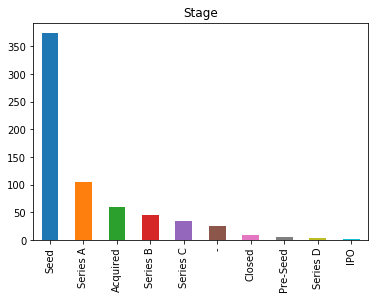

In [31]:
comp['stage'].value_counts().plot(kind='bar')
plt.title("Stage")
plt.show()

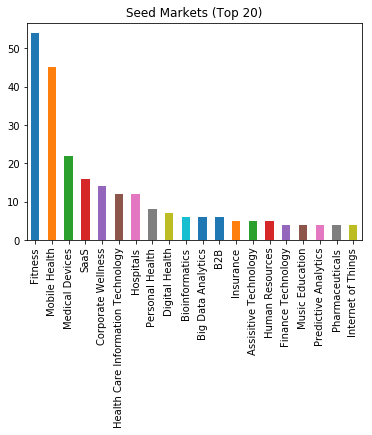

In [32]:
comp[comp['stage'] == "Seed"]['market'].value_counts()[:20].plot(kind='bar')
plt.title("Seed Markets (Top 20)")
plt.show()

In [33]:
comp.shape

(663, 12)